In [104]:
import keras
import os
import pickle
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib.image import imsave
from imgaug import augmenters as iaa
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [106]:
print("Number of Images in the First Category :",len(os.listdir('X/')))
print("Number of Images in the Second Category :",len(os.listdir('Y/')))

Number of Images in the First Category : 60
Number of Images in the Second Category : 65


### Shwoing a random image from the dataset

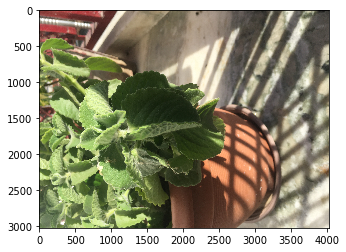

In [107]:
image1 = imread('X/'+os.listdir('X')[5])
plt.imshow(image1)
plt.show()

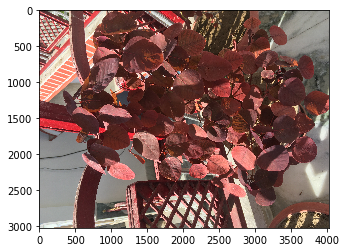

In [109]:
image2 = imread('Y/'+os.listdir('Y')[4])
plt.imshow(image2)
plt.show()

In [214]:
print("Size of an Image: " , imread('train/X/' + os.listdir('train/X')[4]).shape)

Size of an Image:  (224, 224, 4)


### resizing the images to avoid the memory error:

In [145]:
if not os.path.isfile('train'):
    os.mkdir('train')
    if not os.path.isfile('train/X'):
        os.mkdir('train/X')
        filename = 0
        for name in os.listdir('X/'):
            image = imread('X/'+name)
            x = cv2.resize(image,(224,224))#changing the shape of each and every image
            #images.append(x)
            imsave('train/X/'+str(filename)+'.PNG',x)
            filename+=1
        print("Resizing done for X Category")
    else:
        print("X Category Already Exist")
    if  not os.path.isfile('train/Y'):
        os.mkdir('train/Y')
        filename=0
        for name in os.listdir('Y/'):
            image = imread('Y/'+name)
            x = cv2.resize(image,(224,224))#changing the shape of each and every image
            #images.append(x)
            imsave('train/Y/'+str(filename)+'.PNG',x)
            filename+=1
        print("Resizing done for Y category")
    else:
        print("Y Category Already Exist")
else:
    print("training data already exist")

Resizing done for X Category
Resizing done for Y category


In [250]:
x.shape

(224, 224, 4)

### deviding the data into train test split

In [255]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(directory='train/', target_size=(224,224),classes=['X', 'Y'])
test_generator = test_datagen.flow_from_directory(directory='test/', target_size=(224,224),classes=['X', 'Y'],shuffle=False)

Found 115 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [256]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [271]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(224,224,3))) ##image shape is (224,224,3) we have resized all the images
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.5))  #to avoid overfitting
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))      #to avoid overfitting
model.add(Dense(2, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [272]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
dropout_29 (Dropout)         (None, 72, 72, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 331776)            0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               42467456  
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)             

In [273]:
history = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples//train_generator.batch_size,epochs=10,validation_data=train_generator, validation_steps=5,verbose=1)

Epoch 1/10
3/3 [==============================] - 7s 2s/step - loss: 101.3116 - accuracy: 0.4578 - val_loss: 3.8556 - val_accuracy: 0.4966
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 3.7197 - accuracy: 0.6667 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 0.1288 - accuracy: 0.9639 - val_loss: 0.0306 - val_accuracy: 0.9864
Epoch 4/10
3/3 [==============================] - 7s 2s/step - loss: 0.0905 - accuracy: 0.9518 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 7s 2s/step - loss: 0.0366 - accuracy: 0.9880 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.0250 - accuracy: 0.9880 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 0.0405 - accuracy: 0.9759 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 8/10
3/3 [=======================

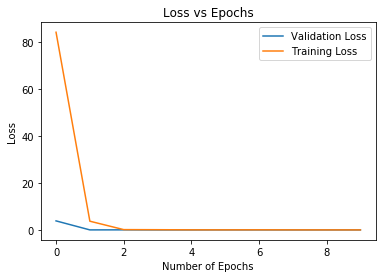

In [277]:
##here we have not used validation set for the cross validation
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend(['Validation Loss','Training Loss'])
plt.show()

In [278]:
probabilities = model.predict_generator(test_generator)

In [279]:
evl = model.evaluate_generator(test_generator)
print("Accuracy of the Model: ",evl[1])
print("Loss of the Model: ",evl[0])

Accuracy of the Model:  1.0
Loss of the Model:  0.00472708884626627


In [280]:
y_test = test_generator.classes ##true label from the dataset

In [281]:
pred= model.predict_generator(test_generator)

In [282]:
y_predicted=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())

In [283]:
labels2

{0: 'X', 1: 'Y'}

In [284]:
confusion_matrix(y_test,y_predicted)
# we are getting 100% accuracy because our dataset is fairly simple

array([[5, 0],
       [0, 5]], dtype=int64)

In [285]:
filename = 'plant_detection.pickle'
pickle.dump(model, open(filename, 'wb'))